In [1]:
#Para los cálculos matemáticos
import numpy as np
#Para el manejo de datos
import pandas as pd
#para realizar los gráficos
from matplotlib import pyplot as plt 
#Importar librería para realizar un SVM
from sklearn import svm
from sklearn.datasets import make_circles

In [2]:
#Crear conjunto de datos

df, value = make_circles(n_samples=500, noise=.05, factor=.5)

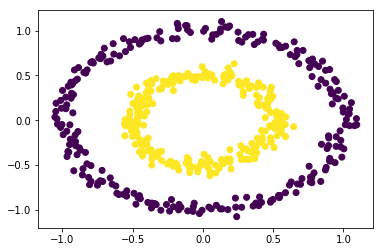

In [3]:
#Graficar conjunto de datos

plt.scatter(df[:,0], df[:,1], c=value)
plt.show()

In [4]:
#Calcular el valor más alto de dimensiones

x = df[: ,0]
y = df[: ,1]
z = x**2 + y**2

kernals = ['linear', 'poly', 'rbf']
training_set = np.c_[x,y] #Une los vectores x y en una matriz de dos columnas

In [5]:
#Entrenar y predecir para cada kernel

for kernal in kernals:
    clf = svm.SVC(kernel=kernal, gamma=2)
    #Entrenar modelo
    clf.fit(training_set, value)
    #Evaluar modelo
    prediction = clf.predict([[-0.4,-0.4]])
    print(prediction)

[1]
[1]
[1]


In [6]:
#Graficar varios kernels

#Gráficos de linea, de puntos, y de vectores cercanos al plano

X = training_set
y = value
X0 = X[np.where(y==0)] #extrae valores de X considerando valores de y iguales a 0
X1 = X[np.where(y==1)] #extrar valores de X considerando valores de y iguales a 1

plt.figure()

x_min = X[:,0].min()
x_max = X[:,0].max()
y_min = X[:,1].min()
y_max = X[:,1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] #Grillla de datos de 200 x 200

Z = clf.decision_function(np.c_[XX.ravel(),YY.ravel()]) #Las matrices XX y YY se quedan establecidas en una matriz de una linea


<Figure size 432x288 with 0 Axes>

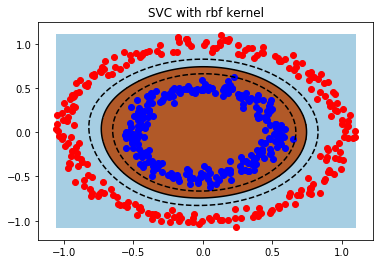

In [7]:
#poner el resultado en el gráfico de colores

Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap = plt.cm.Paired)

plt.contour(XX, YY, Z, colors=['k','k','k'], linestyles =['--','-','--'], levels=[-.5, 0, .5])

plt.scatter(X0[:,0], X0[:,1], c='r')
plt.scatter(X1[:,0], X1[:,1], c='b')

title = ('SVC with {} kernel').format(kernal)
plt.title(title)
plt.show()
